
# Kindersterblichkeitsrate

- "Wir untersuchen und recherchieren nach Gründen für die unterschiedlichen Kindersterblichkeitsraten in verschiedenen Ländern."   

### Gruppe:  
- Marie Weiss (weissma8@students.zhaw.ch)  
- Nicole Merola (merolnic@students.zhaw.ch)

### Datenquelle:
https://www.unicef.de/informieren/aktuelles/blog/-/kindersterblichkeit-weltweit-warum-sterben-kinder/274050


In [1]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# lade hier deine Daten
df = pd.read_csv("child-mortality.csv")
df


,Entity,Code,Year,Child mortality rate
0,Afghanistan,AFG,1957,37.13
1,Afghanistan,AFG,1958,36.52
2,Afghanistan,AFG,1959,35.95
3,Afghanistan,AFG,1960,35.32
4,Afghanistan,AFG,1961,34.76
...,...,...,...,...
16830,Zimbabwe,ZWE,2019,5.11
16831,Zimbabwe,ZWE,2020,5.01
16832,Zimbabwe,ZWE,2021,4.76
16833,Zimbabwe,ZWE,2022,4.60


In [3]:
df.columns


Index(['Entity', 'Code', 'Year', 'Child mortality rate'], dtype='object')

In [4]:
latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year]


In [5]:
# Rohdaten sind bereits im Long-Format (Entity, Code, Year, Value)
df_pivot = df.pivot(index="Entity", columns="Year", values="Child mortality rate")
df_pivot.head()


Year,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.51,7.24,7.00,6.76,6.54,6.33,6.13,5.93,5.74,5.55
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.68,7.49,7.31,7.17,6.83,6.66,6.43,6.27,6.22,5.91
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.99,0.96,0.94,0.93,0.93,0.94,0.94,0.95,0.94,0.94
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.54,2.49,2.45,2.40,2.37,2.33,2.29,2.26,2.23,2.20
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.37,0.35,0.34,0.32,0.31,0.30,0.29,0.28,0.27,0.26


In [6]:
top_5_high = (
    df_latest.sort_values(by="Child mortality rate", ascending=False)
             [["Entity", "Child mortality rate"]]
             .head(5)
)

top_5_high


,Entity,Child mortality rate
10769,Niger,11.48
10831,Nigeria,10.49
13618,Somalia,10.40
2902,Chad,10.11
13881,South Sudan,9.87


In [7]:
top_5_low = (
    df_latest.sort_values(by="Child mortality rate", ascending=True)
             [["Entity", "Child mortality rate"]]
             .head(5)
)

top_5_low

,Entity,Child mortality rate
12876,San Marino,0.14
13375,Singapore,0.21
4645,Estonia,0.21
13495,Slovenia,0.22
5132,Finland,0.23


In [8]:
df.dtypes


Entity                   object
Code                     object
Year                      int64
Child mortality rate    float64
dtype: object

In [9]:
print("Anzahl verschiedener Entities (Länder/Gebiete):", df["Entity"].nunique())
df["Entity"].value_counts().head(10)


Anzahl verschiedener Entities (Länder/Gebiete): 213


Entity
Sweden            273
World             224
France            208
Austria           190
Belgium           190
Denmark           189
Norway            188
Iceland           186
Netherlands       184
United Kingdom    183
Name: count, dtype: int64

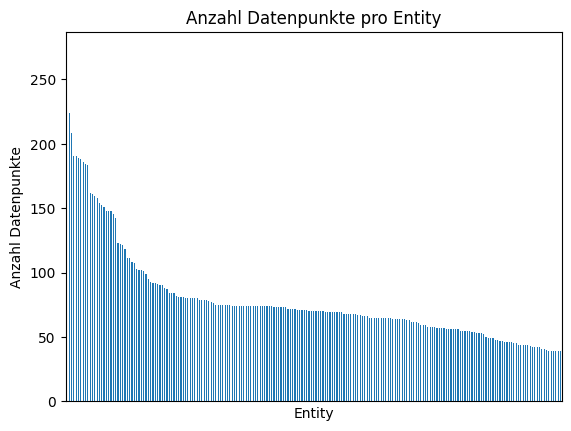

In [10]:
df["Entity"].value_counts().plot(
    kind="bar",
    xticks=[],
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro Entity"
)
plt.show()


**Anzahl Datenpunkte pro Entity**

Diese Grafik zeigt, wie viele Datenpunkte pro Entity (Land oder Gebiet) im Datensatz vorhanden sind.  
Man erkennt, dass einige Länder über sehr lange Zeitreihen verfügen, während andere deutlich weniger Datenpunkte haben.  
Dies ist wichtig für die Analyse, da Länder mit wenigen Datenpunkten weniger zuverlässig über längere Zeiträume verglichen werden können.

In [11]:
print("Anzahl verschiedener Codes:", df["Code"].nunique())
df["Code"].value_counts().head(10)


Anzahl verschiedener Codes: 202


Code
SWE         273
OWID_WRL    224
FRA         208
BEL         190
AUT         190
DNK         189
NOR         188
ISL         186
NLD         184
GBR         183
Name: count, dtype: int64

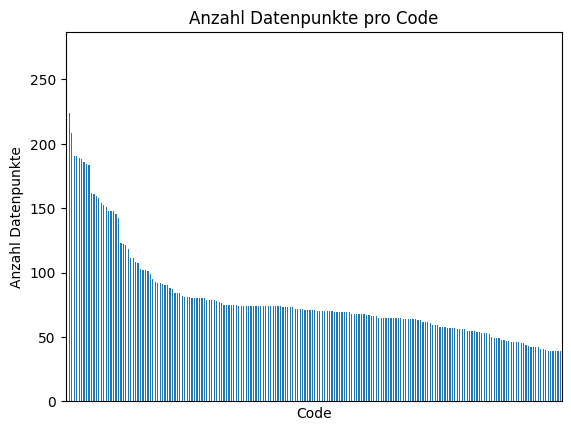

In [12]:
df["Code"].value_counts().plot(
    kind="bar",
    xticks=[],
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro Code"
)
plt.show()


**Anzahl Datenpunkte pro Code**

Diese Grafik zeigt die Anzahl der vorhandenen Datenpunkte pro Ländercode.  
Da jedem Code ein Land zugeordnet ist, bestätigt diese Darstellung die ungleichmäßige zeitliche Abdeckung der Daten.  
Die Ergebnisse stimmen mit der vorherigen Entity-Analyse überein und zeigen strukturelle Unterschiede im Datensatz.


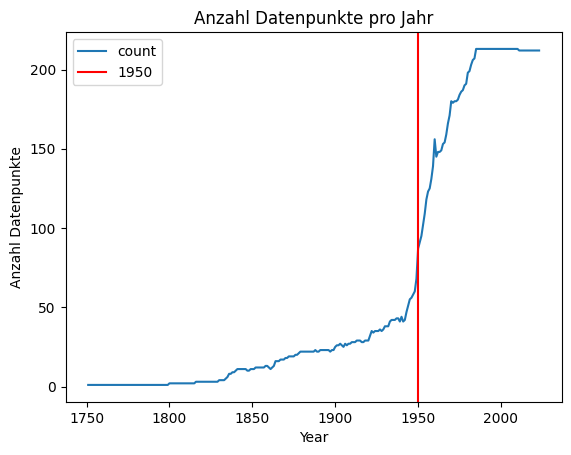

In [13]:
g = df["Year"].value_counts().sort_index().plot(
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro Jahr"
)
g.axvline(x=1950, color="red", label="1950")
g.legend()
plt.show()


**Anzahl Datenpunkte pro Jahr**

Diese Grafik zeigt, wie viele Länder pro Jahr im Datensatz erfasst sind.  
Die rote Linie bei 1950 markiert einen deutlichen Wendepunkt, ab dem die Datenabdeckung stark zunimmt.  
Dies deutet darauf hin, dass ab der zweiten Hälfte des 20. Jahrhunderts deutlich mehr Länder systematisch erfasst wurden.


In [14]:
df[["Year", "Child mortality rate"]].describe()


,Year,Child mortality rate
count,16835.000000,16835.000000
mean,1974.431838,10.726533
std,41.301284,10.787012
min,1751.000000,0.140000
25%,1960.000000,2.160000
50%,1984.000000,6.580000
75%,2004.000000,16.705000
max,2023.000000,76.740000


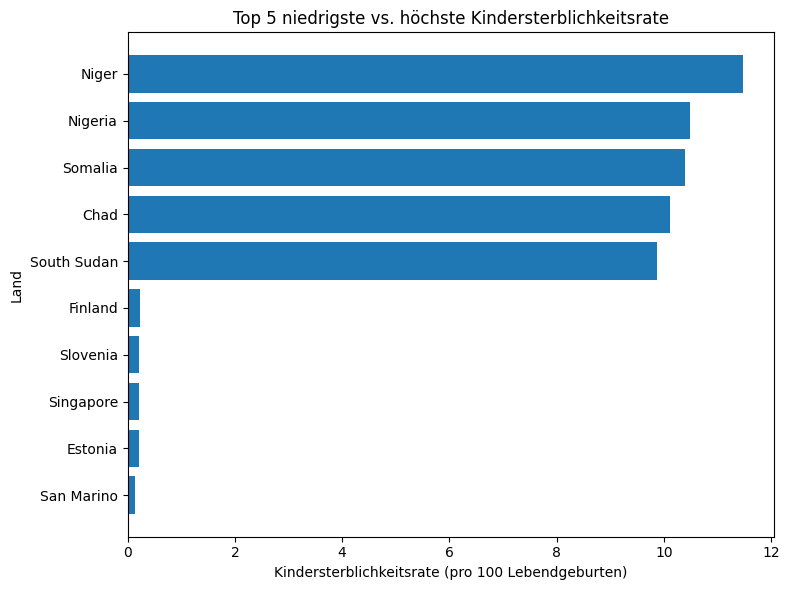

,Entity,Child mortality rate
0,San Marino,0.14
1,Estonia,0.21
2,Singapore,0.21
3,Slovenia,0.22
4,Finland,0.23
9,South Sudan,9.87
8,Chad,10.11
7,Somalia,10.40
6,Nigeria,10.49
5,Niger,11.48


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Sicherheit: fehlende Werte entfernen
df_latest_clean = df_latest.dropna(subset=["Child mortality rate"])

# Top 5 tief & hoch
top_5_low = df_latest_clean.nsmallest(5, "Child mortality rate")[["Entity", "Child mortality rate"]]
top_5_high = df_latest_clean.nlargest(5, "Child mortality rate")[["Entity", "Child mortality rate"]]

# Zusammenführen
compare = pd.concat([top_5_low, top_5_high], ignore_index=True)

# Sortieren für horizontales Diagramm
compare_sorted = compare.sort_values(by="Child mortality rate")

# Plot
plt.figure(figsize=(8,6))
plt.barh(compare_sorted["Entity"], compare_sorted["Child mortality rate"])
plt.xlabel("Kindersterblichkeitsrate (pro 100 Lebendgeburten)")
plt.ylabel("Land")
plt.title("Top 5 niedrigste vs. höchste Kindersterblichkeitsrate")
plt.tight_layout()
plt.show()

compare_sorted



**Vergleich der 5 Länder mit der niedrigsten und der 5 Länder mit der höchsten Kindersterblichkeitsrate**

Die Grafik zeigt die Kindersterblichkeitsrate (pro 1'000 Lebendgeburten) im aktuellsten verfügbaren Jahr für die 5 Länder mit den niedrigsten Werten und die 5 Länder mit den höchsten Werten.

Auffällig ist der sehr grosse Abstand zwischen beiden Gruppen: Die Länder mit niedriger Kindersterblichkeitsrate (San Marino, Singapur, Estland, Slowenien, Finnland) haben sehr kleine Werte, während die Länder mit hoher Kindersterblichkeitsrate (Niger, Nigeria, Somalia, Tschad, Südsudan) deutlich höhere Werte aufweisen.  
Dies weist auf starke globale Unterschiede hin, die typischerweise mit Faktoren wie medizinischer Versorgung, Lebensstandard, Ernährung, Zugang zu sauberem Wasser und politischer Stabilität zusammenhängen.


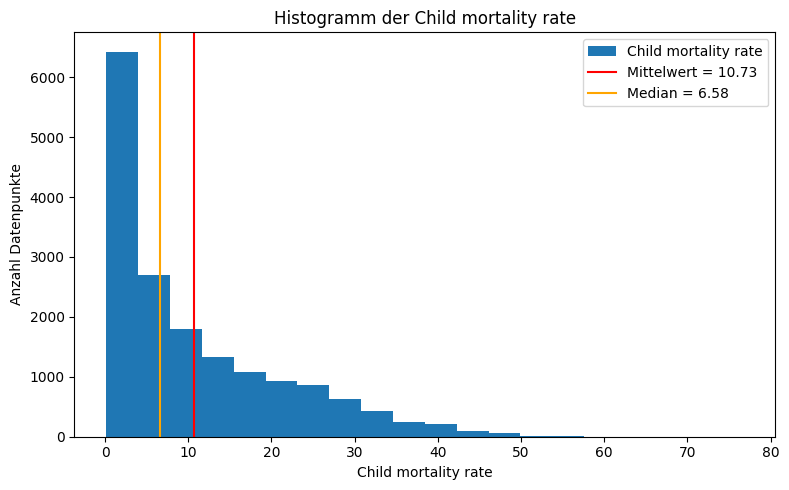

In [16]:
plt.figure(figsize=(8,5))

vals = df["Child mortality rate"].dropna()
plt.hist(vals, bins=20, label="Child mortality rate")

mean_val = vals.mean()
median_val = vals.median()

plt.axvline(mean_val, color="red", label=f"Mittelwert = {mean_val:.2f}")
plt.axvline(median_val, color="orange", label=f"Median = {median_val:.2f}")

plt.xlabel("Child mortality rate")
plt.ylabel("Anzahl Datenpunkte")
plt.title("Histogramm der Child mortality rate")
plt.legend()
plt.tight_layout()
plt.show()


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



In [17]:
latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year].dropna(subset=["Child mortality rate"])
latest_year


np.int64(2023)

In [18]:
top_5_high = df_latest.nlargest(5, "Child mortality rate")[["Entity", "Child mortality rate"]]
top_5_low  = df_latest.nsmallest(5, "Child mortality rate")[["Entity", "Child mortality rate"]]

top_5_high, top_5_low


(            Entity  Child mortality rate
 10769        Niger                 11.48
 10831      Nigeria                 10.49
 13618      Somalia                 10.40
 2902          Chad                 10.11
 13881  South Sudan                  9.87,
            Entity  Child mortality rate
 12876  San Marino                  0.14
 4645      Estonia                  0.21
 13375   Singapore                  0.21
 13495    Slovenia                  0.22
 5132      Finland                  0.23)

### Fragestellung: Wie korreliert die Kindersterblichkeit mit der Armut in der Welt

In [19]:
# Datensatz laden:
poverty = pd.read_csv("share-of-population-living-in-extreme-poverty.csv")


In [ ]:
# colmn checken
poverty.columns


Index(['Country', 'Year', 'Share below $3 a day'], dtype='object')

Datensätze vorbereiten

In [21]:
df_child = df[[
    "Entity",
    "Code",
    "Year",
    "Child mortality rate"
]].dropna(subset=["Child mortality rate"])


In [26]:
df_child.columns


Index(['Entity', 'Code', 'Year', 'Child mortality rate'], dtype='object')

In [27]:
df_child = df_child.rename(columns={
    "Child mortality rate": "child_mortality"
})


In [23]:
df_poverty = poverty[[
    "Country",
    "Year",
    "Share below $3 a day"
]].dropna(subset=["Share below $3 a day"])


In [24]:
df_poverty = df_poverty.rename(columns={
    "Country": "Entity",
    "Share below $3 a day": "extreme_poverty"
})


CSV Zusammenführen

In [29]:
df_merged = pd.merge(
    df_child,
    df_poverty,
    on=["Entity", "Year"],
    how="inner"
)


In [30]:
df_merged.columns
df_merged.head()


,Entity,Code,Year,child_mortality,extreme_poverty
0,Albania,ALB,1996,3.24,2.967841
1,Albania,ALB,2002,2.43,4.194722
2,Albania,ALB,2005,2.00,2.650218
3,Albania,ALB,2008,1.58,0.827308
4,Albania,ALB,2012,1.12,1.794590


In [31]:
latest_year = df_merged["Year"].max()

df_latest = (
    df_merged[df_merged["Year"] == latest_year]
        .dropna(subset=["Code"])
)


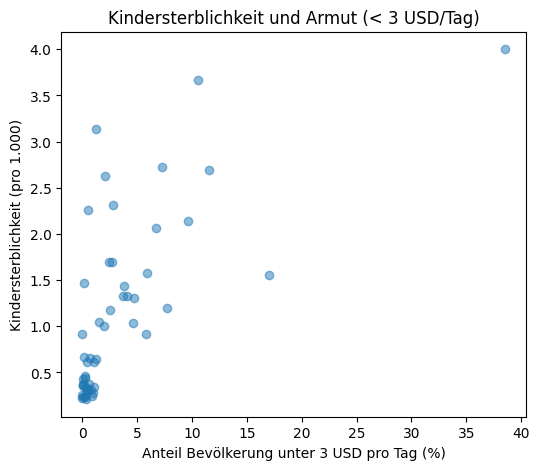

In [32]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_latest["extreme_poverty"],
    df_latest["child_mortality"],
    alpha=0.5
)

plt.xlabel("Anteil Bevölkerung unter 3 USD pro Tag (%)")
plt.ylabel("Kindersterblichkeit (pro 1.000)")
plt.title("Kindersterblichkeit und Armut (< 3 USD/Tag)")

plt.show()


## Zusammenhang zwischen Armut (< 3 USD/Tag) und Kindersterblichkeit

*(Scatterplot: Anteil der Bevölkerung unter 3 USD pro Tag vs. Kindersterblichkeitsrate, letztes verfügbares Jahr)*

### Beschreibung
Die Grafik zeigt einen Streudiagramm-Zusammenhang zwischen dem Anteil der Bevölkerung, der unter der Armutsgrenze von 3 US-Dollar pro Tag lebt, und der Kindersterblichkeitsrate. Jeder Punkt repräsentiert ein Land im jeweils letzten verfügbaren Jahr.

### Interpretation
Es zeigt sich ein klarer positiver Zusammenhang zwischen Armut und Kindersterblichkeit. Länder mit einem hohen Anteil armer Bevölkerung weisen in der Regel deutlich höhere Kindersterblichkeitsraten auf. Umgekehrt liegen Länder mit geringer Armutsquote fast ausschließlich im Bereich niedriger Kindersterblichkeit.

### Auffälligkeiten
- Die Beziehung ist **nicht linear**, sondern eher **konkav**: Bereits moderate Reduktionen der Armutsquote gehen mit starken Rückgängen der Kindersterblichkeit einher.  
- Länder mit sehr niedriger Armut unterscheiden sich untereinander nur noch gering in der Kindersterblichkeit, was auf ein **Sättigungsniveau** bei hoher Gesundheitsversorgung hindeutet.  
- Einzelne Ausreißer verdeutlichen, dass Armut zwar ein zentraler, aber nicht der einzige Einflussfaktor ist. Politische Stabilität, staatliche Gesundheitsausgaben und Bildung spielen ebenfalls eine wichtige Rolle.

### Wichtiger Hinweis
Die Grafik zeigt eine **starke Korrelation**, aber **keine Kausalität**. Dennoch spricht das beobachtete Muster für einen strukturellen Zusammenhang, bei dem Armut als ein wesentlicher Risikofaktor für erhöhte Kindersterblichkeit fungiert.


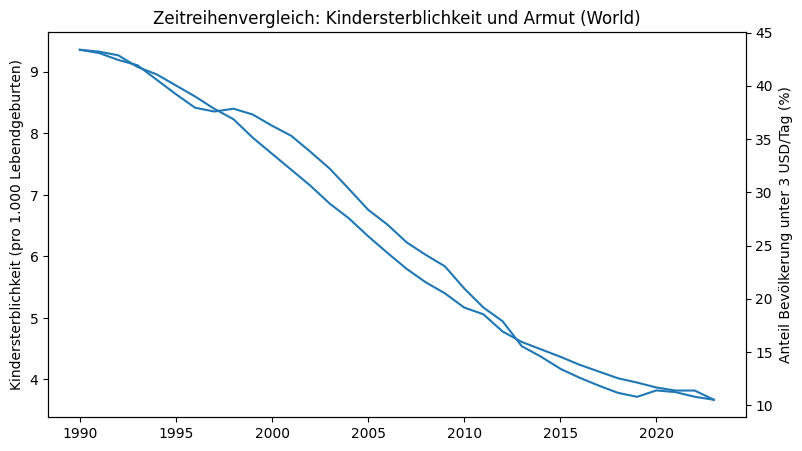

In [34]:
# Zeitreihenvergleich für die Welt
df_world = df_merged[df_merged["Entity"] == "World"].sort_values("Year")

plt.figure(figsize=(9, 5))

# Kindersterblichkeit (linke Achse)
plt.plot(
    df_world["Year"],
    df_world["child_mortality"],
    label="Kindersterblichkeit",
)
plt.ylabel("Kindersterblichkeit (pro 1.000 Lebendgeburten)")

# Zweite y-Achse für Armut
ax2 = plt.gca().twinx()
ax2.plot(
    df_world["Year"],
    df_world["extreme_poverty"],
    label="Anteil unter 3 USD/Tag",
)
ax2.set_ylabel("Anteil Bevölkerung unter 3 USD/Tag (%)")

plt.title("Zeitreihenvergleich: Kindersterblichkeit und Armut (World)")
plt.xlabel("Jahr")

plt.show()


### Interpretation: Zeitreihenvergleich Kindersterblichkeit und Armut (World)

Die Grafik zeigt die zeitliche Entwicklung der globalen Kindersterblichkeit und des Anteils der Bevölkerung, der unter der Armutsgrenze von 3 US-Dollar pro Tag lebt. Beide Zeitreihen weisen über den betrachteten Zeitraum einen deutlichen und langfristigen Rückgang auf.

Die Kindersterblichkeit sinkt kontinuierlich, insbesondere seit der zweiten Hälfte des 20. Jahrhunderts. Parallel dazu geht auch die globale Armutsquote stark zurück. Der zeitliche Gleichlauf der beiden Kurven deutet auf einen engen strukturellen Zusammenhang zwischen wirtschaftlichen Lebensbedingungen und der Gesundheit von Kindern hin.

Phasen besonders starker Armutsreduktion gehen mit ausgeprägten Rückgängen der Kindersterblichkeit einher. Dies spricht dafür, dass Verbesserungen der Ernährung, der medizinischen Grundversorgung, des Zugangs zu sauberem Wasser sowie höhere Bildungsniveaus eine zentrale Rolle spielen.

In jüngeren Jahren verlangsamt sich der Rückgang der Kindersterblichkeit, obwohl die Armutsquote weiter sinkt. Dies deutet auf einen Sättigungseffekt hin: Weitere Verbesserungen hängen zunehmend von gezielten gesundheitspolitischen und technologischen Maßnahmen ab.

Die Grafik zeigt eine zeitliche Koinzidenz, jedoch keine Kausalität. Dennoch stützt der parallele Verlauf beider Zeitreihen die Annahme, dass Armutsreduktion eine zentrale Voraussetzung für nachhaltige Verbesserungen der globalen Kindergesundheit ist.
